<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [ ]:
##### Your Code Here #####

In [135]:
from tensorflow.keras.datasets import boston_housing
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
#gather and clean data: 
(X_train, y_train),(X_test, y_test)=boston_housing.load_data()

In [104]:
scaler=MinMaxScaler()
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [136]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013782,0.000,0.281525,0.0,0.314815,0.499806,0.914521,0.297191,0.130435,0.227533,0.893617,1.000000,0.468819
1,0.000174,0.825,0.057551,0.0,0.061728,0.784082,0.131823,0.536537,0.043478,0.305927,0.223404,0.996167,0.038079
2,0.054984,0.000,0.646628,0.0,0.506173,0.272851,1.000000,0.021178,1.000000,0.913958,0.808511,0.946089,0.042219
3,0.000374,0.000,0.173387,0.0,0.267490,0.479473,0.325438,0.506821,0.173913,0.068834,0.808511,1.000000,0.173289
4,0.041439,0.000,0.646628,0.0,0.674897,0.545120,0.880536,0.150041,1.000000,0.913958,0.808511,0.986207,0.356512
5,0.003120,0.000,0.253666,0.0,0.222222,0.415763,0.735324,0.374868,0.173913,0.189293,0.744681,0.985451,0.276214
6,0.103189,0.000,0.646628,0.0,0.648148,0.382455,1.000000,0.047053,1.000000,0.913958,0.808511,1.000000,0.603477
7,0.045983,0.000,0.700880,0.0,1.000000,0.369287,1.000000,0.029455,0.173913,0.411090,0.223404,1.000000,0.681291
8,0.024151,0.000,0.700880,0.0,1.000000,0.400271,1.000000,0.040394,0.173913,0.411090,0.223404,0.426017,0.411700
9,0.018234,0.000,0.785557,0.0,0.491770,0.282339,1.000000,0.032336,0.130435,0.476099,0.914894,1.000000,0.901766


In [48]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [142]:
model=Sequential()
model.add(Dense(5, input_dim=13, activation='relu'))
#model.add(Dense(7, activation='relu'))
#model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 5)                 70        
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [148]:
hist=model.fit(X_train,y_train, epochs=1000, verbose=False)

In [149]:
model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[29.45817984786688, 29.45818, 3.4629707]

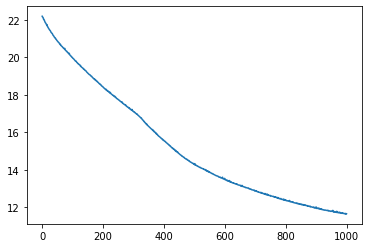

In [150]:
plt.plot(hist.history['mse'])


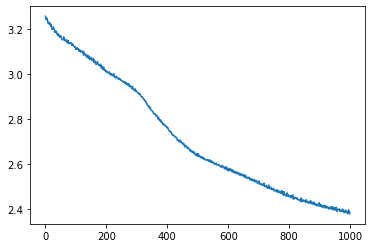

In [151]:
plt.plot(hist.history['mae'])

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [154]:
from tensorflow.keras.datasets import fashion_mnist

In [155]:
(X_train, y_train), (X_test, y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [158]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.